# 🤖 AI, CA3, Machine Learning 📚  

* **Name** : [Amir] 🖊  
* **Last Name** : [Faridi] 📝  
* **SID** : [610300087] 🆔

## 🧹 Data Preprocessing  
Implement all your preprocessing in this section, following the guidelines provided in the project documentation 📄.  

### 📥 Load Dataset  
In this subsection, you should load the dataset as a pandas dataframe 🐼.

In [39]:
# !pip install termcolor
"""
    Run the above command to download termcolor package for colored text.
"""


"""
    Import the required libraries.
"""
import warnings
warnings.filterwarnings('ignore')

import sys, os, numpy, random, re
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from termcolor import colored

In [40]:
"""
    Load the dataset. The missing values for each variable is visible from the overall description of the data.
"""
df = pd.read_csv("./hotels_in_europe.csv")
data = df.copy()

display(df.head(5))
display(df.describe())
display(df.info())

,name,location,price,rating,quality,review,bed,size,distance_from_center,room_type,nights,adults,free_cancellation
0,WIT Hotel,"9th arr., Paris","IRR 7,951,542",7.1,Good,"3,300 reviews",1 double bed,20m²,1.9,Suite,1 night,1 adult,NaN
1,UCPA SPORT STATION HOSTEL PARIS,"19th arr., Paris","IRR 1,397,677",8.0,Very good,"5,921 reviews",1 single bed,NaN,4.6,Single Bed in 6-Bed Dormitory Room,1 night,1 adult,NaN
2,Timhotel Montmartre,"18th arr., Paris","IRR 7,569,083",8.3,Very good,"2,532 reviews",1 single bed,NaN,3.4,Comfort Single Room,1 night,1 adult,NaN
3,Hôtel Galileo Champs Elysées,"8th arr., Paris","IRR 6,447,737",8.6,Fabulous,"1,457 reviews",1 large double bed,NaN,4.2,Classic Room,1 night,1 adult,NaN
4,Hôtel Le Daum,"12th arr., Paris","IRR 7,913,496",8.3,Very good,"1,273 reviews",1 double bed,NaN,4.1,Comfort Double Room,1 night,1 adult,NaN


,rating,distance_from_center
count,7129.000000,7322.000000
mean,7.742783,24.699399
std,1.128965,82.440210
min,1.000000,0.500000
25%,7.300000,2.200000
50%,8.000000,3.700000
75%,8.400000,5.800000
max,10.000000,500.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7322 entries, 0 to 7321
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  7322 non-null   object 
 1   location              7322 non-null   object 
 2   price                 7322 non-null   object 
 3   rating                7129 non-null   float64
 4   quality               7169 non-null   object 
 5   review                7169 non-null   object 
 6   bed                   7299 non-null   object 
 7   size                  2454 non-null   object 
 8   distance_from_center  7322 non-null   float64
 9   room_type             7322 non-null   object 
 10  nights                7322 non-null   object 
 11  adults                7322 non-null   object 
 12  free_cancellation     583 non-null    object 
dtypes: float64(2), object(11)
memory usage: 743.8+ KB


None

In [41]:
""" You can find the unique values of each column with their corresponding occurence count with the following code """
def uniques(columns : list[str], df : pd.DataFrame):
    for col in columns:
        unique_with_counts = [(val, df[col].value_counts(dropna=False).get(val, 0)) for val in df[col].unique()]
        print(colored(f"Unique values of {col}:\n", "blue"), colored(f"{unique_with_counts}", "yellow"), end='\n\n')
uniques(columns = ["location"], df = df)

Unique values of location:
 [('9th arr., Paris', np.int64(99)), ('19th arr., Paris', np.int64(160)), ('18th arr., Paris', np.int64(155)), ('8th arr., Paris', np.int64(87)), ('12th arr., Paris', np.int64(224)), ('3rd arr., Paris', np.int64(51)), ('7th arr., Paris', np.int64(12)), ('15th arr., Paris', np.int64(114)), ('10th arr., Paris', np.int64(115)), ('20th arr., Paris', np.int64(141)), ('16th arr., Paris', np.int64(78)), ('13th arr., Paris', np.int64(72)), ('5th arr., Paris', np.int64(26)), ('17th arr., Paris', np.int64(122)), ('14th arr., Paris', np.int64(70)), ('4th arr., Paris', np.int64(51)), ('Barajas, Madrid', np.int64(77)), ('Villaverde, Madrid', np.int64(18)), ('Centro, Madrid', np.int64(912)), ('Ciudad Lineal, Madrid', np.int64(53)), ('San Blas, Madrid', np.int64(267)), ('Moncloa-Aravaca, Madrid', np.int64(132)), ('Arganzuela, Madrid', np.int64(32)), ('Salamanca, Madrid', np.int64(77)), ('Retiro, Madrid', np.int64(22)), ('Mitte, Berlin', np.int64(721)), ('Charlottenburg-Wilm

### 🧩 Manipulate Columns 🔢  
In this subsection, you should extract numerical values from columns and also convert categorical data to numerical values,as described in the project documentation 📄.

### 🛠 Handling Missing Values 💡
In this subsection, you are supposed to handle null and missing values, following regular techinuques, used in this context

In [42]:
def check_nan_in_review_and_rating():
    review_nan = df[df['review'].isna()]
    rating_nan = df[df["rating"].isna()]
    both_nan   = df[df['review'].isna() & df["rating"].isna()]

    print(colored("-"*43 + "review is nan" + "-"*44, "yellow"))
    print(review_nan.info())
    print(colored("-"*43 + "rating is nan" + "-"*44, "yellow"))
    print(rating_nan.info())
    print(colored("-"*37 + "rating and review are nan" + "-"*38, "yellow"))
    print(both_nan.info())

check_nan_in_review_and_rating()
"""
    Is can be seen from the output of this cell that missing valeus of review is a 
        subset of missing values of rating.
    So it is reasonable to drop the records where the rating is missing.
"""

-------------------------------------------review is nan--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 628 to 6340
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  153 non-null    object 
 1   location              153 non-null    object 
 2   price                 153 non-null    object 
 3   rating                0 non-null      float64
 4   quality               0 non-null      object 
 5   review                0 non-null      object 
 6   bed                   153 non-null    object 
 7   size                  75 non-null     object 
 8   distance_from_center  153 non-null    float64
 9   room_type             153 non-null    object 
 10  nights                153 non-null    object 
 11  adults                153 non-null    object 
 12  free_cancellation     0 non-null      object 
dtypes: float64(2), object(11)


'\n    Is can be seen from the output of this cell that missing valeus of review is a \n        subset of missing values of rating.\n    So it is reasonable to drop the records where the rating is missing.\n'

In [43]:
def extract_ints(val):
    if pd.isna(val): return val

    if isinstance(val, str):
        val = re.sub(r'[^\d]', '', val)  
        return int(val) if val.isdigit() else None
    raise ValueError

data["nights"] = data["nights"].apply(extract_ints)
data["adults"] = data["adults"].apply(extract_ints)
data["price"]  = data["price"].apply(extract_ints)
data["review"] = data["review"].apply(extract_ints)
"""
    Extracting the desired integer values out of these variables according to their structure.
"""

'\n    Extracting the desired integer values out of these variables according to their structure.\n'

In [44]:
data = data.dropna(subset = ["rating"])

def extract_first_int(val):
    if pd.isna(val): return val
    
    if isinstance(val, str):
        match = re.search(r'\d+', str(val))  
        return int(match.group()) if match else None
    raise ValueError  

data["bed"]    = data["bed"].apply(extract_first_int)
"""
    Due to the different structure of this variable, I wrote a different regex to extract the useful values out of it.
"""

'\n    Due to the different structure of this variable, I wrote a different regex to extract the useful values out of it.\n'

In [45]:
"""
    Extracting the integer values from the size variable.
"""
data['size'] = data['size'].str.extract('(\d+)').astype(float)
display(data.head(5))

,name,location,price,rating,quality,review,bed,size,distance_from_center,room_type,nights,adults,free_cancellation
0,WIT Hotel,"9th arr., Paris",7951542,7.1,Good,3300.0,1.0,20.0,1.9,Suite,1,1,NaN
1,UCPA SPORT STATION HOSTEL PARIS,"19th arr., Paris",1397677,8.0,Very good,5921.0,1.0,NaN,4.6,Single Bed in 6-Bed Dormitory Room,1,1,NaN
2,Timhotel Montmartre,"18th arr., Paris",7569083,8.3,Very good,2532.0,1.0,NaN,3.4,Comfort Single Room,1,1,NaN
3,Hôtel Galileo Champs Elysées,"8th arr., Paris",6447737,8.6,Fabulous,1457.0,1.0,NaN,4.2,Classic Room,1,1,NaN
4,Hôtel Le Daum,"12th arr., Paris",7913496,8.3,Very good,1273.0,1.0,NaN,4.1,Comfort Double Room,1,1,NaN


In [46]:
"""
    Two methods of imputation for missing values.
"""
# data['size'] = data['size'].fillna(data['size'].mean())
# data['size'] = data['size'].fillna(data['size'].median())
display(data.describe())

,price,rating,review,bed,size,distance_from_center,nights,adults
count,7.129000e+03,7129.000000,7129.000000,6662.000000,2365.000000,7129.000000,7129.000000,7129.000000
mean,3.035378e+07,7.742783,3059.232992,2.361303,58.494715,25.263403,2.645252,3.293870
std,3.818725e+07,1.128965,3960.958370,1.406515,39.718336,83.475456,1.485992,1.193378
min,6.007210e+05,1.000000,1.000000,1.000000,10.000000,0.500000,1.000000,1.000000
25%,7.929515e+06,7.300000,214.000000,1.000000,35.000000,2.200000,1.000000,2.000000
50%,1.946336e+07,8.000000,1677.000000,2.000000,48.000000,3.800000,2.000000,3.000000
75%,3.840609e+07,8.400000,4233.000000,3.000000,70.000000,5.800000,4.000000,4.000000
max,6.674405e+08,10.000000,25125.000000,14.000000,550.000000,500.000000,5.000000,5.000000


In [47]:
"""
    Extracting the useful values from the location variable.
"""
data['location'] = data['location'].str.split(',').str[1].str.strip()
uniques(columns = ["location"], df = data)

Unique values of location:
 [('Paris', np.int64(1728)), ('Madrid', np.int64(1831)), ('Berlin', np.int64(1914)), ('London', np.int64(1501)), (nan, np.int64(155))]



In [48]:
display(data.head(5))
display(data.info())
"""
    Removing the records with missing locations.
"""
data = data.dropna(subset = ["location"])

,name,location,price,rating,quality,review,bed,size,distance_from_center,room_type,nights,adults,free_cancellation
0,WIT Hotel,Paris,7951542,7.1,Good,3300.0,1.0,20.0,1.9,Suite,1,1,NaN
1,UCPA SPORT STATION HOSTEL PARIS,Paris,1397677,8.0,Very good,5921.0,1.0,NaN,4.6,Single Bed in 6-Bed Dormitory Room,1,1,NaN
2,Timhotel Montmartre,Paris,7569083,8.3,Very good,2532.0,1.0,NaN,3.4,Comfort Single Room,1,1,NaN
3,Hôtel Galileo Champs Elysées,Paris,6447737,8.6,Fabulous,1457.0,1.0,NaN,4.2,Classic Room,1,1,NaN
4,Hôtel Le Daum,Paris,7913496,8.3,Very good,1273.0,1.0,NaN,4.1,Comfort Double Room,1,1,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 7129 entries, 0 to 7321
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  7129 non-null   object 
 1   location              6974 non-null   object 
 2   price                 7129 non-null   int64  
 3   rating                7129 non-null   float64
 4   quality               7129 non-null   object 
 5   review                7129 non-null   float64
 6   bed                   6662 non-null   float64
 7   size                  2365 non-null   float64
 8   distance_from_center  7129 non-null   float64
 9   room_type             7129 non-null   object 
 10  nights                7129 non-null   int64  
 11  adults                7129 non-null   int64  
 12  free_cancellation     583 non-null    object 
dtypes: float64(5), int64(3), object(5)
memory usage: 779.7+ KB


None

In [49]:
location_mapping = {'Berlin': 0, 'London': 1, 'Madrid': 2, 'Paris': 3}
data['location_indicator'] = data['location'].map(location_mapping)

display(data.head(5))

,name,location,price,rating,quality,review,bed,size,distance_from_center,room_type,nights,adults,free_cancellation,location_indicator
0,WIT Hotel,Paris,7951542,7.1,Good,3300.0,1.0,20.0,1.9,Suite,1,1,NaN,3
1,UCPA SPORT STATION HOSTEL PARIS,Paris,1397677,8.0,Very good,5921.0,1.0,NaN,4.6,Single Bed in 6-Bed Dormitory Room,1,1,NaN,3
2,Timhotel Montmartre,Paris,7569083,8.3,Very good,2532.0,1.0,NaN,3.4,Comfort Single Room,1,1,NaN,3
3,Hôtel Galileo Champs Elysées,Paris,6447737,8.6,Fabulous,1457.0,1.0,NaN,4.2,Classic Room,1,1,NaN,3
4,Hôtel Le Daum,Paris,7913496,8.3,Very good,1273.0,1.0,NaN,4.1,Comfort Double Room,1,1,NaN,3


### ➕ Additional Columns  
In this subsection, you should add some additional columns to the dataframe, according to the project documentation 📄.

In [50]:
data['combined_score'] = ((data['review'] - data['review'].mean()) / data['review'].std()) * ((data['rating'] - data['rating'].mean()) / data['rating'].std())
# display(data[['combined_score']].head(5))

max_rating = 10
data['weighted_score'] = data['review'] * (data['rating'] / max_rating)
# display(data[['review', 'rating', 'weighted_score']].head(5))
"""
    The above are two different combination of review and rating. I'll use the second one the model.
"""


"""
    Replacing the missing values of bed variable with adults since they are highly correlated.
"""
data['bed'] = data["bed"].fillna(data["adults"])
# display(data[['bed', 'adults']].head(20))

In [51]:
data = data.drop(
    [
     "name",                # This only the name which cannot be interpreted by the model unless we could get some sentimental features out of this variable which is not a easy thing to do.
     "quality",             # There already exists a "rating" feature. The "quality" columns is only a categorized version of "rating".
     "location",            # Could be useful. But since the model has a good outcome, I decided to keep this one out.
    #  "bed", 
     "room_type",           # A descriptive variable which cannot be feed to the models.
     "size",                # More than 60% of this variable is lost.
    ],
      axis = 1)

"""
  Handling the structure of free cancellation.
"""
data["free_cancellation"] = data['free_cancellation'].apply(lambda x: 1 if x == 'Free cancellation' else 0)

## 📊 Data Visualization  
Research and explore various data visualization techniques 🔍 to identify the best options for your project 🎯. Different approaches may be suitable for different aspects of your data 📈.

In [52]:
data

,price,rating,review,bed,distance_from_center,nights,adults,free_cancellation,location_indicator,combined_score,weighted_score
0,7951542,7.1,3300.0,1.0,1.9,1,1,0,3,-0.027783,2343.00
1,1397677,8.0,5921.0,1.0,4.6,1,1,0,3,0.166459,4736.80
2,7569083,8.3,2532.0,1.0,3.4,1,1,0,3,-0.071831,2101.56
3,6447737,8.6,1457.0,1.0,4.2,1,1,0,3,-0.316866,1253.02
4,7913496,8.3,1273.0,1.0,4.1,1,1,0,3,-0.230195,1056.59
...,...,...,...,...,...,...,...,...,...,...,...
7317,31998398,8.0,5933.0,1.0,0.9,4,2,0,0,0.167168,4746.40
7318,14817781,7.7,1546.0,2.0,4.9,4,2,0,0,0.011901,1190.42
7319,30236284,8.3,5813.0,2.0,2.8,4,2,0,0,0.340872,4824.79
7320,19503404,8.0,8631.0,1.0,3.9,4,2,1,0,0.326542,6904.80


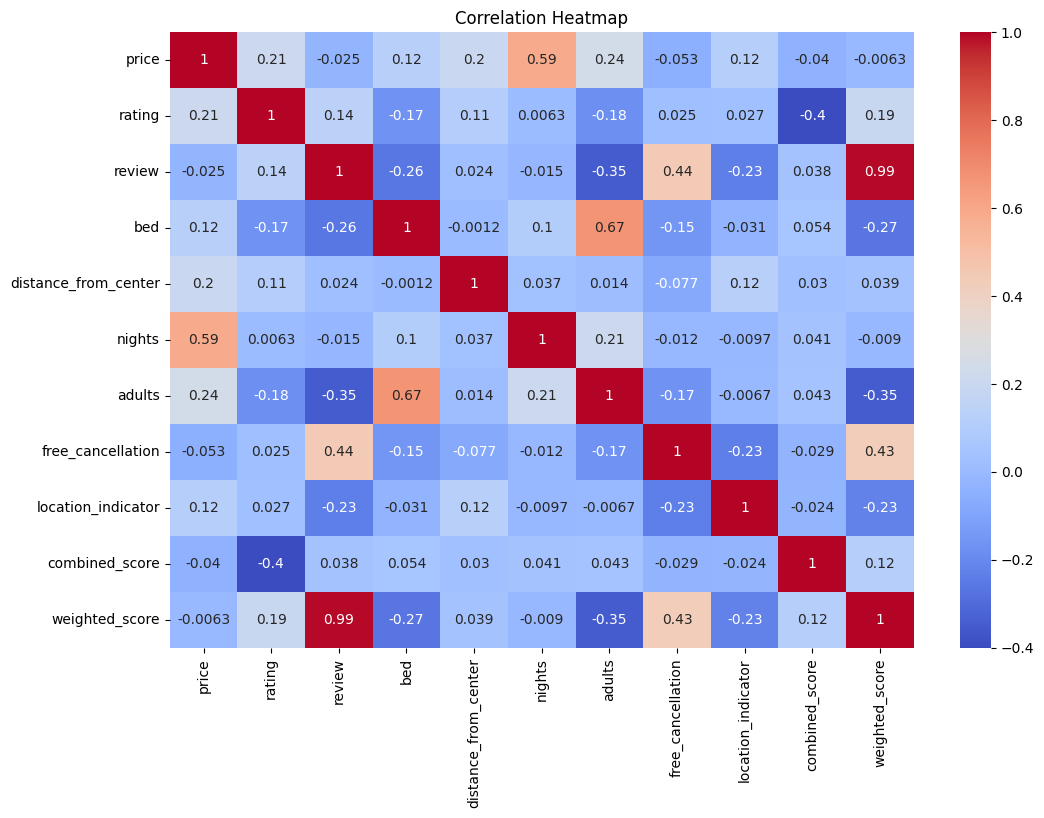

In [53]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

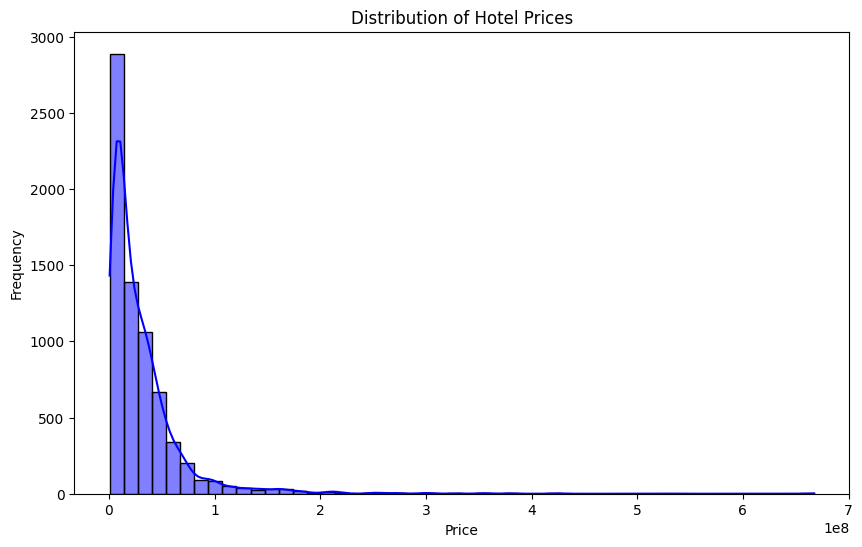

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True, color='blue')
plt.title('Distribution of Hotel Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

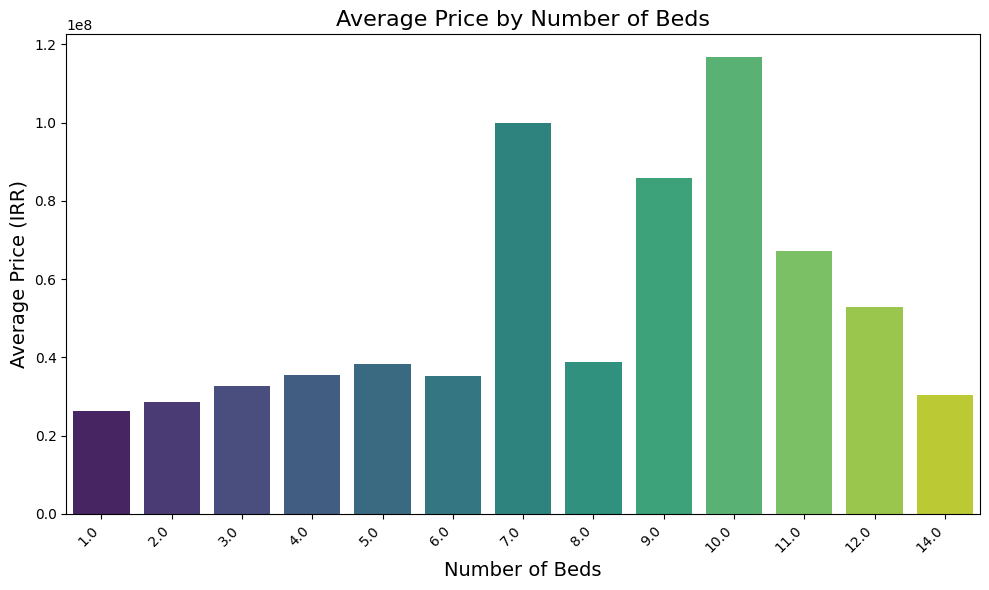

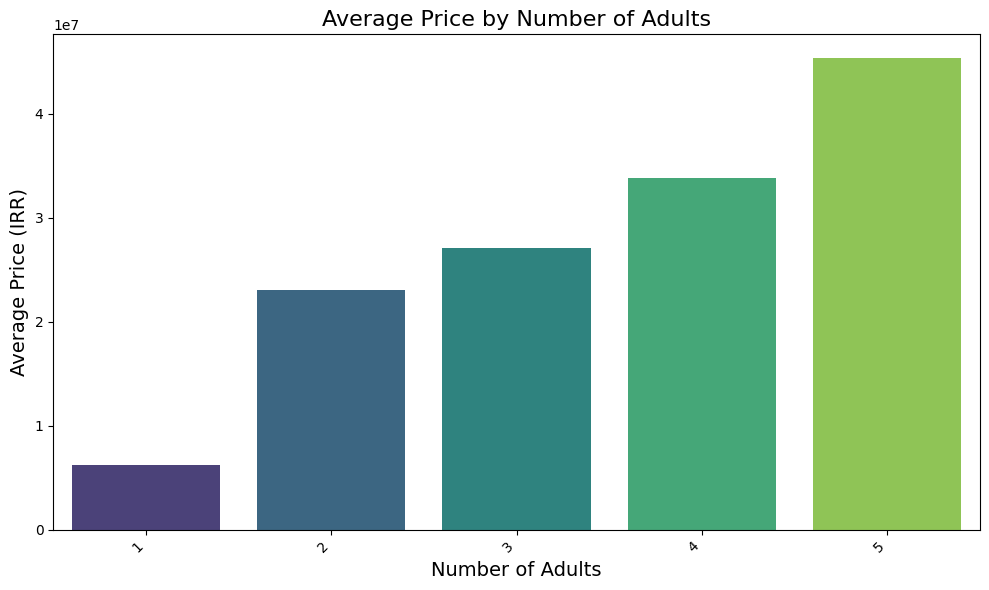

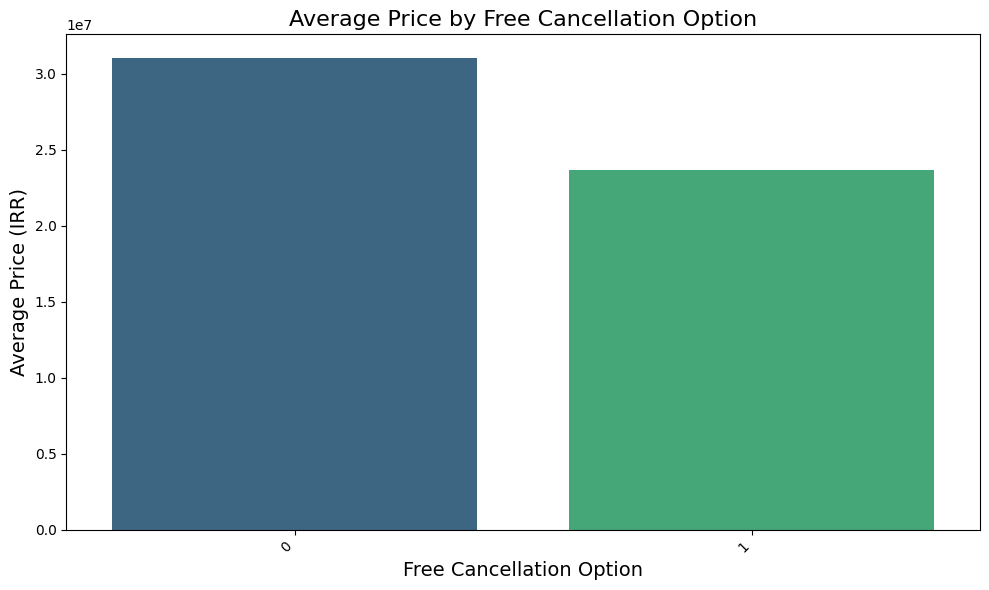

In [55]:
price_bed = data.groupby('bed')['price'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=price_bed.index, y=price_bed.values, palette="viridis")
plt.title('Average Price by Number of Beds', fontsize=16)
plt.xlabel('Number of Beds', fontsize=14)
plt.ylabel('Average Price (IRR)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --------------------------------------------------------------------------------

price_adults = data.groupby('adults')['price'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=price_adults.index, y=price_adults.values, palette="viridis")
plt.title('Average Price by Number of Adults', fontsize=16)
plt.xlabel('Number of Adults', fontsize=14)
plt.ylabel('Average Price (IRR)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --------------------------------------------------------------------------------

price_cancellation = data.groupby('free_cancellation')['price'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=price_cancellation.index, y=price_cancellation.values, palette="viridis")
plt.title('Average Price by Free Cancellation Option', fontsize=16)
plt.xlabel('Free Cancellation Option', fontsize=14)
plt.ylabel('Average Price (IRR)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

count    6974.000000
mean       25.291755
std        84.338827
min         0.500000
25%         2.100000
50%         3.700000
75%         5.500000
max       500.000000
Name: distance_from_center, dtype: float64

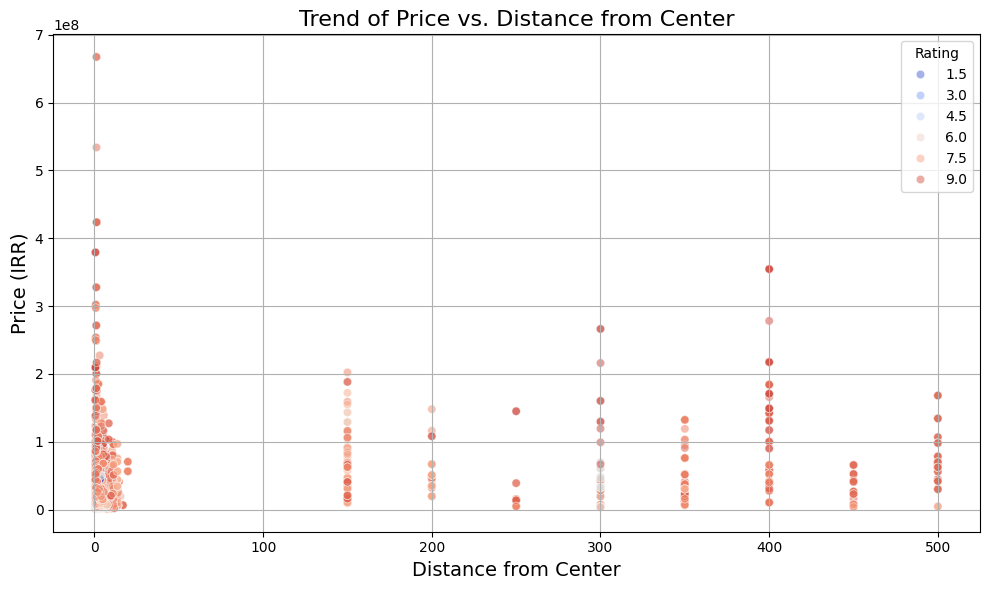

In [56]:
display(data["distance_from_center"].describe())

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='distance_from_center', y='price', hue='rating', palette='coolwarm', alpha=0.5)

plt.title('Trend of Price vs. Distance from Center', fontsize=16)
plt.xlabel('Distance from Center', fontsize=14)
plt.ylabel('Price (IRR)', fontsize=14)
plt.legend(title="Rating", loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

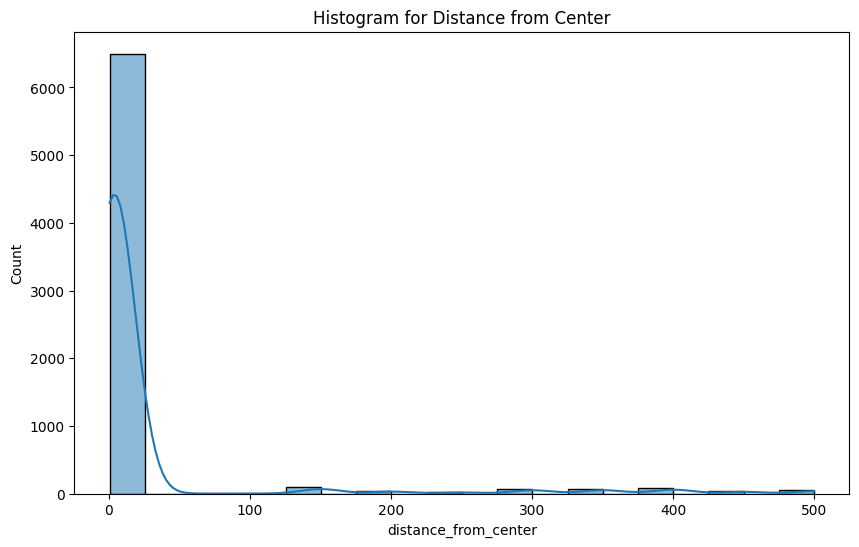

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(data['distance_from_center'], bins=20, kde=True)
plt.title('Histogram for Distance from Center')
plt.show()

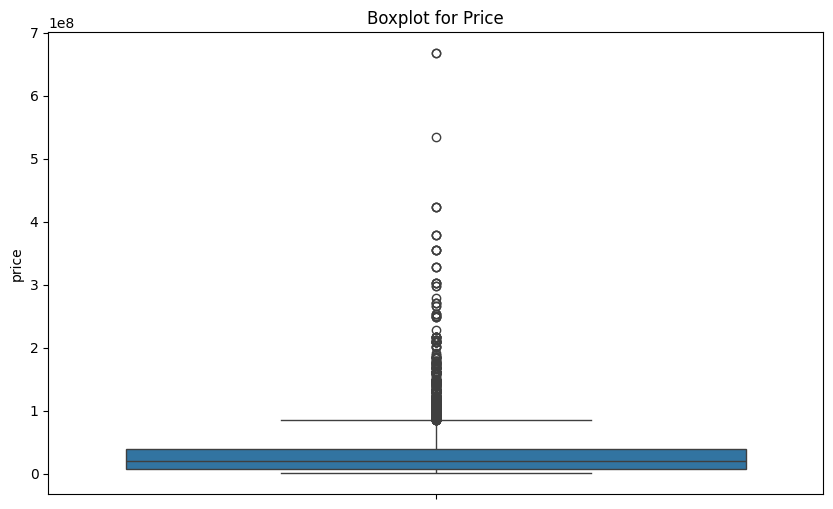

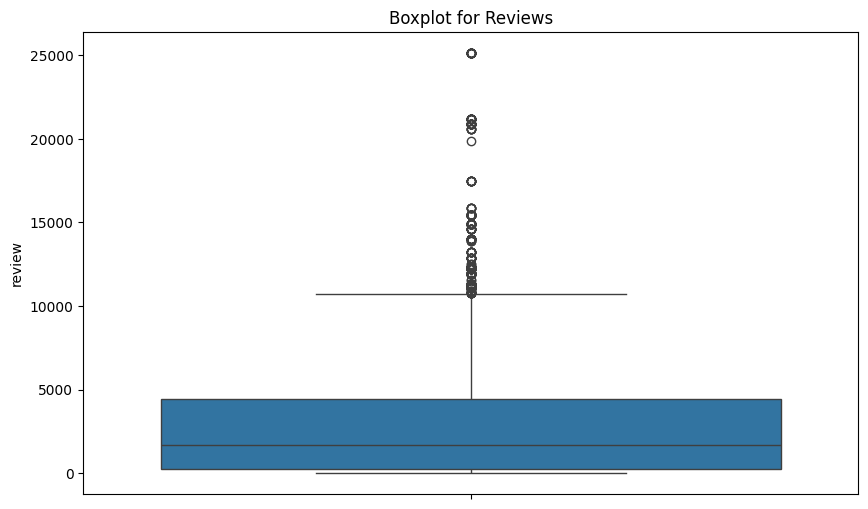

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, y='price')
plt.title('Boxplot for Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, y='review')
plt.title('Boxplot for Reviews')
plt.show()

In [59]:
"""
    Handling outlier to get better results.
"""

from scipy.stats import zscore
def detect_outliers_zscore(data : pd.DataFrame, column : str):
    data['z_score'] = zscore(data['column'])
    price_outliers_z = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
    print(f"Number of outliers in {column} (Z-score method): {len(price_outliers_z)}")

def detect_ouliers_categorical(data : pd.DataFrame, columns : list[str]):
    for col in columns:
        print(f"Value counts for {col}:\n{data[col].value_counts()}\n")


def detect_outliers_IQR(data : pd.DataFrame, column : str, return_flag : bool = False):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers if not return_flag else (outliers, Q1, Q3, IQR, lower_bound, upper_bound)

poutliers = detect_outliers_IQR(data, "price")
print(f"Number of outliers in price: {len(poutliers)}")
display(poutliers.head())

routliers = detect_outliers_IQR(data, "review")
print(f"Number of outliers in reviews: {len(routliers)}")
display(routliers.head())

Number of outliers in price: 409


,price,rating,review,bed,distance_from_center,nights,adults,free_cancellation,location_indicator,combined_score,weighted_score
962,103366440,10.0,1.0,3.0,6.3,5,5,0,0,-1.562923,1.0
985,103366440,10.0,1.0,3.0,6.3,5,5,0,0,-1.562923,1.0
1008,103366440,10.0,1.0,3.0,6.3,5,5,0,0,-1.562923,1.0
1033,103366440,10.0,1.0,3.0,6.3,5,5,0,0,-1.562923,1.0
1036,86781373,7.0,9.0,6.0,10.4,5,5,0,1,0.505292,6.3


Number of outliers in reviews: 427


,price,rating,review,bed,distance_from_center,nights,adults,free_cancellation,location_indicator,combined_score,weighted_score
10,1269523,7.3,11103.0,1.0,2.7,1,1,0,3,-0.772763,8105.19
18,1269523,7.3,11103.0,1.0,2.7,1,1,0,3,-0.772763,8105.19
26,1269523,7.3,11103.0,1.0,2.7,1,1,0,3,-0.772763,8105.19
44,1269523,7.3,11103.0,1.0,2.7,1,1,0,3,-0.772763,8105.19
68,1786944,8.9,11172.0,1.0,0.7,1,1,0,2,2.091588,9943.08


In [60]:
"""
    Removing the outliers in the variable "review". This could be done on any other variable.
"""

_, _, _, _, review_lower_bound, review_upper_bound = detect_outliers_IQR(data, "review", return_flag = True)
_data = data[~((data['review'] < review_lower_bound) | (data['review'] > review_upper_bound))]
print(f"Number of rows after removing outliers: {len(_data)}")

Number of rows after removing outliers: 6547


### 🏷 Assigning Labels  
In this subsection, we want to assign labels to hotels 🏨, according to their price 💰.  
We have two labels:  
- **0** for hotels with a price less than a threshold 🟢.  
- **1** for those with higher prices 🔴.  

To determine the threshold, we use the median of prices 📊.  
In the first step, complete the following function. Then, you should use the `apply` method of pandas 🐼 to assign labels to each hotel.

In [61]:
DATA = _data.copy() 

def assign_label(x, column):
    """
        x:price(int),
        column:"price"(str),
        returns label of x as explained
    """
    return 0 if x < DATA[column].median() else 1

DATA['target'] = DATA['price'].apply(assign_label, column='price')
display(DATA)

,price,rating,review,bed,distance_from_center,nights,adults,free_cancellation,location_indicator,combined_score,weighted_score,target
0,7951542,7.1,3300.0,1.0,1.9,1,1,0,3,-0.027783,2343.00,0
1,1397677,8.0,5921.0,1.0,4.6,1,1,0,3,0.166459,4736.80,0
2,7569083,8.3,2532.0,1.0,3.4,1,1,0,3,-0.071831,2101.56,0
3,6447737,8.6,1457.0,1.0,4.2,1,1,0,3,-0.316866,1253.02,0
4,7913496,8.3,1273.0,1.0,4.1,1,1,0,3,-0.230195,1056.59,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7316,25734882,7.8,1750.0,1.0,1.9,4,2,0,0,-0.019748,1365.00,1
7317,31998398,8.0,5933.0,1.0,0.9,4,2,0,0,0.167168,4746.40,1
7318,14817781,7.7,1546.0,2.0,4.9,4,2,0,0,0.011901,1190.42,0
7319,30236284,8.3,5813.0,2.0,2.8,4,2,0,0,0.340872,4824.79,1


## 🏷 Classification  
In this section, we will go through the classification pipeline. We will deploy several machine learning models to classify hotels based on their price 💵. Finally, you will implement a boosting algorithm from scratch 🛠 and compare its performance with the library implementation 📚.

### 🔀 Train-Test Split  
You should divide the data into a training set and a test set. Use 20% of the data for testing and 80% for training 📊.

In [62]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from scipy.stats import ks_2samp, chi2_contingency, uniform, randint

X = DATA.drop([
               "target", "price", 
               "combined_score", 
               "weighted_score",
            #    "rating", "review", # Since we combined them.
               ], 
               axis=1)  
y = DATA['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(colored(f"Training set size: {X_train.shape[0]} samples", "yellow"))
print(colored(f"Testing set size: {X_test.shape[0]} samples", "yellow"))


"""
    Doing a ks_2samp test on the splitted data to see if they are splitted well. (sklearn handles this issue. Just for addtional information)
"""
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(colored("\n\n### Hypothesis Testing for Numerical Features (K-S Test) ###\n", 'green'))
for feature in numerical_features:
    stat, p_value = ks_2samp(X_train[feature].dropna(), X_test[feature].dropna())
    print(colored(f"Feature: {feature}", "cyan"))
    print(colored(f"K-S Statistic: {stat:.4f}, p-value: {p_value:.4f}", "cyan"))
    if p_value < 0.05:
        print(colored("Result: Reject H0 - Distributions are significantly different.\n", 'cyan'))
    else:
        print(colored("Result: Fail to reject H0 - Distributions are similar.\n", 'cyan'))

Training set size: 5237 samples
Testing set size: 1310 samples


### Hypothesis Testing for Numerical Features (K-S Test) ###

Feature: rating
K-S Statistic: 0.0276, p-value: 0.3954
Result: Fail to reject H0 - Distributions are similar.

Feature: review
K-S Statistic: 0.0259, p-value: 0.4737
Result: Fail to reject H0 - Distributions are similar.

Feature: bed
K-S Statistic: 0.0154, p-value: 0.9618
Result: Fail to reject H0 - Distributions are similar.

Feature: distance_from_center
K-S Statistic: 0.0214, p-value: 0.7123
Result: Fail to reject H0 - Distributions are similar.

Feature: nights
K-S Statistic: 0.0248, p-value: 0.5292
Result: Fail to reject H0 - Distributions are similar.

Feature: adults
K-S Statistic: 0.0118, p-value: 0.9982
Result: Fail to reject H0 - Distributions are similar.

Feature: free_cancellation
K-S Statistic: 0.0023, p-value: 1.0000
Result: Fail to reject H0 - Distributions are similar.

Feature: location_indicator
K-S Statistic: 0.0464, p-value: 0.0210
Result:

### 🌐 Normalization  
One of the most important steps in the classification pipeline is normalization. You will be asked about the importance of this step ⚙️.

In [63]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

""" 
    This scaler is used when the variation is crucial in the dataset. 
    Works better when the data is distributed normally.
    This methods works better on this data set.
"""
standard_scaler = StandardScaler(with_mean = True, with_std = True)
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

""" This scaler is better when the feature magnitudes are crucial. Works better when the data is distributed uniformly. """
# min_max_scaler = MinMaxScaler()
# X_train_scaled = min_max_scaler.fit_transform(X_train)
# X_test_scaled = min_max_scaler.transform(X_test)

' This scaler is better when the feature magnitudes are crucial. Works better when the data is distributed uniformly. '

### 🚀 Deploying Sklearn Models  
In this subsection, you should use built-in models from the sklearn library for the classification task. Don't forget to show the complete classification report, including the confusion matrix, precision, recall, F1-score, and accuracy 📊. You will be asked about these metrics 📈.

#### 📉 Gaussian Naive Bayes

Gaussian Naive Bayes Classification Results:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       671
           1       0.87      0.86      0.86       639

    accuracy                           0.87      1310
   macro avg       0.87      0.87      0.87      1310
weighted avg       0.87      0.87      0.87      1310

Full Classification Report:
Precision, Recall, F1-Score (Micro):
Precision: 0.8664122137404581
Recall: 0.8664122137404581
F1-Score: 0.8664122137404581

Precision, Recall, F1-Score (Macro):
Precision: 0.8663972523472645
Recall: 0.8662391637455134
F1-Score: 0.8663055604640029

Precision, Recall, F1-Score (Weighted):
Precision: 0.8664086515039833
Recall: 0.8664122137404581
F1-Score: 0.8663978011355317


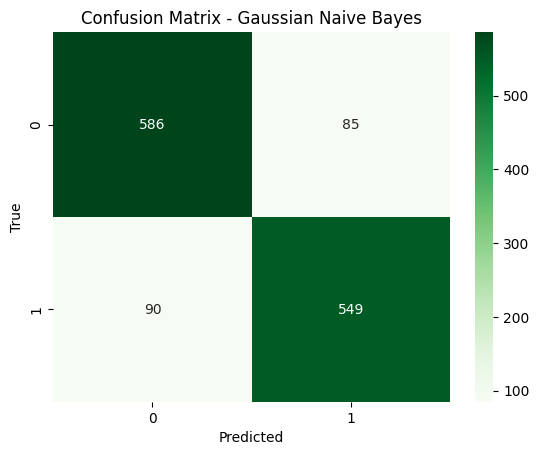

In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

y_pred_gnb = gnb.predict(X_test_scaled)

print(colored("Gaussian Naive Bayes Classification Results:", "cyan"))
print(colored(classification_report(y_test, y_pred_gnb), "green"))

print(colored("Full Classification Report:", "magenta"))

print(colored("Precision, Recall, F1-Score (Micro):", "yellow"))
print(colored(f"Precision: {precision_score(y_test, y_pred_gnb, average='micro')}", "green"))
print(colored(f"Recall: {recall_score(y_test, y_pred_gnb, average='micro')}", "green"))
print(colored(f"F1-Score: {f1_score(y_test, y_pred_gnb, average='micro')}", "green"))

print(colored("\nPrecision, Recall, F1-Score (Macro):", "yellow"))
print(colored(f"Precision: {precision_score(y_test, y_pred_gnb, average='macro')}", "green"))
print(colored(f"Recall: {recall_score(y_test, y_pred_gnb, average='macro')}", "green"))
print(colored(f"F1-Score: {f1_score(y_test, y_pred_gnb, average='macro')}", "green"))

print(colored("\nPrecision, Recall, F1-Score (Weighted):", "yellow"))
print(colored(f"Precision: {precision_score(y_test, y_pred_gnb, average='weighted')}", "green"))
print(colored(f"Recall: {recall_score(y_test, y_pred_gnb, average='weighted')}", "green"))
print(colored(f"F1-Score: {f1_score(y_test, y_pred_gnb, average='weighted')}", "green"))

sns.heatmap(confusion_matrix(y_test, y_pred_gnb), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#### 🌳 Decision Tree Classifier

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best Parameters: {'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       671
           1       0.98      0.99      0.99       639

    accuracy                           0.99      1310
   macro avg       0.99      0.99      0.99      1310
weighted avg       0.99      0.99      0.99      1310

Full Classification Report:
Precision, Recall, F1-Score (Micro):
Precision: 0.9862595419847329
Recall: 0.9862595419847329
F1-Score: 0.9862595419847329

Precision, Recall, F1-Score (Macro):
Precision: 0.9861863962231159
Recall: 0.986363286524912
F1-Score: 0.9862541272594998

Precision, Recall, F1-Score (Weighted):
Precision: 0.986303429441703
Recall: 0.9862595419847329
F1-Score: 0.9862607915367099


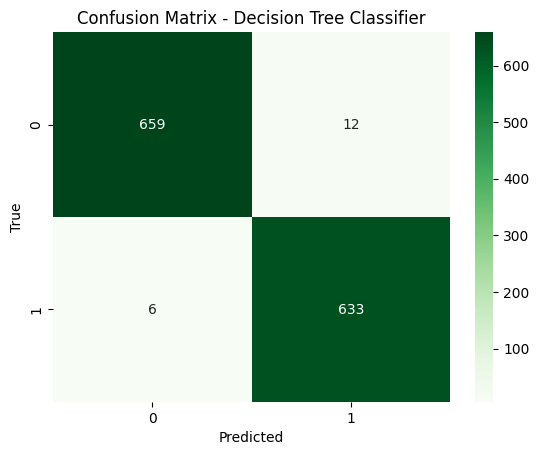

In [65]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

param_grid = {
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [None, 2, 5, 10],
    'min_samples_leaf': [None, 1, 2, 5],
    'max_leaf_nodes': [None, 10, 20, 50]
}
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',         # Use an appropriate metric for your problem
    cv=5,                       # 5-fold cross-validation
    verbose=1,
    n_jobs=-1                   # Use all available cores
)

grid_search.fit(X_train, y_train)
print(colored(f"Best Parameters: {grid_search.best_params_}\n", "magenta"))

dtc = DecisionTreeClassifier(
    random_state = None,
    max_depth = None, 
    min_samples_split = 2,
    min_samples_leaf = 1,
    )
dtc.fit(X_train_scaled, y_train)

y_pred_dtc = dtc.predict(X_test_scaled)

print(colored("Decision Tree Classification Report:", "cyan"))
print(colored(classification_report(y_test, y_pred_dtc), "green"))

print(colored("Full Classification Report:", "magenta"))

print(colored("Precision, Recall, F1-Score (Micro):", "yellow"))
print(colored(f"Precision: {precision_score(y_test, y_pred_dtc, average='micro')}", "green"))
print(colored(f"Recall: {recall_score(y_test, y_pred_dtc, average='micro')}", "green"))
print(colored(f"F1-Score: {f1_score(y_test, y_pred_dtc, average='micro')}", "green"))

print(colored("\nPrecision, Recall, F1-Score (Macro):", "yellow"))
print(colored(f"Precision: {precision_score(y_test, y_pred_dtc, average='macro')}", "green"))
print(colored(f"Recall: {recall_score(y_test, y_pred_dtc, average='macro')}", "green"))
print(colored(f"F1-Score: {f1_score(y_test, y_pred_dtc, average='macro')}", "green"))

print(colored("\nPrecision, Recall, F1-Score (Weighted):", "yellow"))
print(colored(f"Precision: {precision_score(y_test, y_pred_dtc, average='weighted')}", "green"))
print(colored(f"Recall: {recall_score(y_test, y_pred_dtc, average='weighted')}", "green"))
print(colored(f"F1-Score: {f1_score(y_test, y_pred_dtc, average='weighted')}", "green"))

sns.heatmap(confusion_matrix(y_test, y_pred_dtc), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### 🌲🌳 Random Forest Classifier 

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'max_depth': None, 'max_leaf_nodes': 49, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 35}

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       671
           1       0.94      0.96      0.95       639

    accuracy                           0.95      1310
   macro avg       0.95      0.95      0.95      1310
weighted avg       0.95      0.95      0.95      1310

Full Classification Report:
Precision, Recall, F1-Score (Micro):
Precision: 0.9473282442748091
Recall: 0.9473282442748091
F1-Score: 0.9473282442748091

Precision, Recall, F1-Score (Macro):
Precision: 0.9472816864639082
Recall: 0.9475393510258437
F1-Score: 0.9473171618760197

Precision, Recall, F1-Score (Weighted):
Precision: 0.9475299947887138
Recall: 0.9473282442748091
F1-Score: 0.9473358269687179


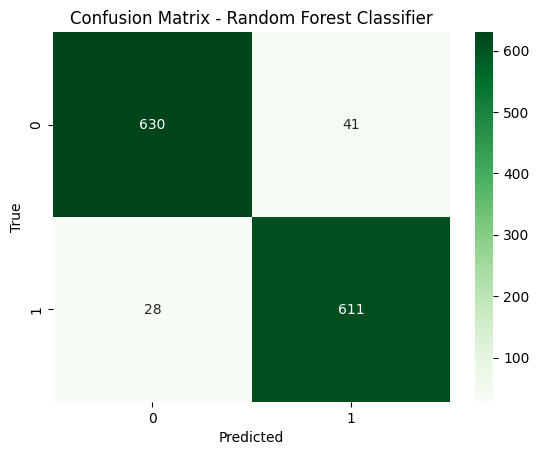

In [66]:
from sklearn.ensemble import RandomForestClassifier

param_distributions = {
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_leaf_nodes': randint(10, 50),
    'n_estimators' : randint(10, 100),
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state = None),
    param_distributions=param_distributions,
    n_iter = 50,
    scoring = 'accuracy',
    cv = 5,
    verbose = 1,
    n_jobs = -1
)
random_search.fit(X_train, y_train)
print(colored(f"Best Parameters: {random_search.best_params_}\n", "magenta"))

rfc = RandomForestClassifier(
    random_state = None, 
    n_estimators = 54,
    max_depth = 10,
    min_samples_split = 16,
    min_samples_leaf = 12,
    max_leaf_nodes = 48 
    )
rfc.fit(X_train_scaled, y_train)

y_pred_rfc = rfc.predict(X_test_scaled)

print(colored("Random Forest Classification Report:", "cyan"))
print(colored(classification_report(y_test, y_pred_rfc), "green"))

print(colored("Full Classification Report:", "magenta"))

print(colored("Precision, Recall, F1-Score (Micro):", "yellow"))
print(colored(f"Precision: {precision_score(y_test, y_pred_rfc, average='micro')}", "green"))
print(colored(f"Recall: {recall_score(y_test, y_pred_rfc, average='micro')}", "green"))
print(colored(f"F1-Score: {f1_score(y_test, y_pred_rfc, average='micro')}", "green"))

print(colored("\nPrecision, Recall, F1-Score (Macro):", "yellow"))
print(colored(f"Precision: {precision_score(y_test, y_pred_rfc, average='macro')}", "green"))
print(colored(f"Recall: {recall_score(y_test, y_pred_rfc, average='macro')}", "green"))
print(colored(f"F1-Score: {f1_score(y_test, y_pred_rfc, average='macro')}", "green"))

print(colored("\nPrecision, Recall, F1-Score (Weighted):", "yellow"))
print(colored(f"Precision: {precision_score(y_test, y_pred_rfc, average='weighted')}", "green"))
print(colored(f"Recall: {recall_score(y_test, y_pred_rfc, average='weighted')}", "green"))
print(colored(f"F1-Score: {f1_score(y_test, y_pred_rfc, average='weighted')}", "green"))

sns.heatmap(confusion_matrix(y_test, y_pred_rfc), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### ⚡️ Adaptive Boosting

Adaptive Boosting Classification Report (n = 10):
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       671
           1       0.89      0.83      0.86       639

    accuracy                           0.87      1310
   macro avg       0.87      0.87      0.87      1310
weighted avg       0.87      0.87      0.87      1310

Full Classification Report:
Precision, Recall, F1-Score (Micro):
Precision: 0.8664122137404581
Recall: 0.8664122137404581
F1-Score: 0.8664122137404581

Precision, Recall, F1-Score (Macro):
Precision: 0.867981220657277
Recall: 0.8656047895253621
F1-Score: 0.8660186469315202

Precision, Recall, F1-Score (Weighted):
Precision: 0.8675247822814752
Recall: 0.8664122137404581
F1-Score: 0.8661960291552667


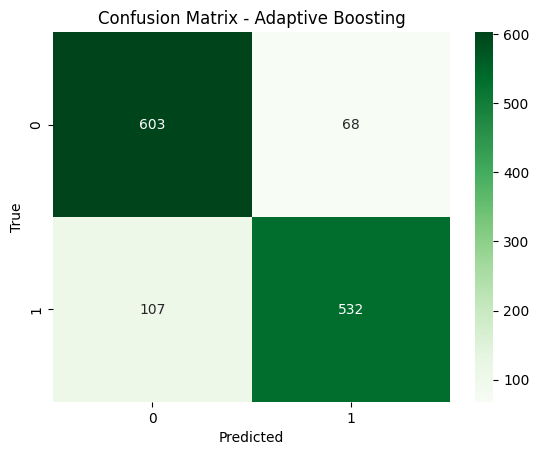

----------------------------------------------------------------------------------------------------
Adaptive Boosting Classification Report (n = 20):
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       671
           1       0.91      0.90      0.91       639

    accuracy                           0.91      1310
   macro avg       0.91      0.91      0.91      1310
weighted avg       0.91      0.91      0.91      1310

Full Classification Report:
Precision, Recall, F1-Score (Micro):
Precision: 0.9114503816793893
Recall: 0.9114503816793893
F1-Score: 0.9114503816793893

Precision, Recall, F1-Score (Macro):
Precision: 0.9115043834778935
Recall: 0.9112855640216526
F1-Score: 0.9113758094918165

Precision, Recall, F1-Score (Weighted):
Precision: 0.9114651094426177
Recall: 0.9114503816793893
F1-Score: 0.9114386071234568


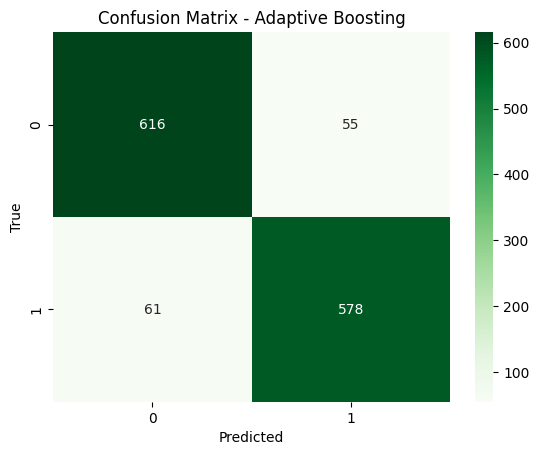

----------------------------------------------------------------------------------------------------
Adaptive Boosting Classification Report (n = 30):
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       671
           1       0.92      0.91      0.92       639

    accuracy                           0.92      1310
   macro avg       0.92      0.92      0.92      1310
weighted avg       0.92      0.92      0.92      1310

Full Classification Report:
Precision, Recall, F1-Score (Micro):
Precision: 0.9190839694656489
Recall: 0.9190839694656489
F1-Score: 0.9190839694656489

Precision, Recall, F1-Score (Macro):
Precision: 0.9191992512527745
Recall: 0.9188863933726552
F1-Score: 0.9190084572761739

Precision, Recall, F1-Score (Weighted):
Precision: 0.9191223967280241
Recall: 0.9190839694656489
F1-Score: 0.9190688670277539


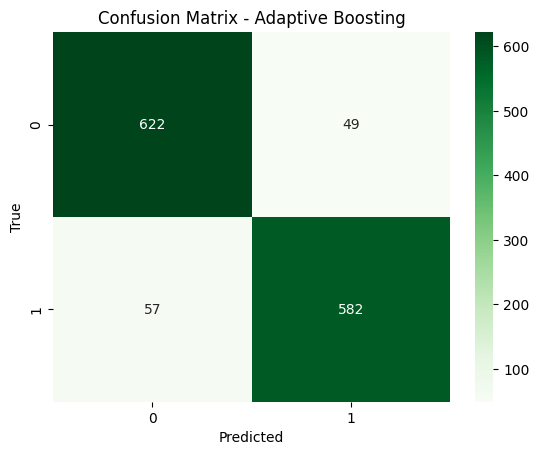

----------------------------------------------------------------------------------------------------
Adaptive Boosting Classification Report (n = 40):
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       671
           1       0.92      0.91      0.92       639

    accuracy                           0.92      1310
   macro avg       0.92      0.92      0.92      1310
weighted avg       0.92      0.92      0.92      1310

Full Classification Report:
Precision, Recall, F1-Score (Micro):
Precision: 0.9183206106870229
Recall: 0.9183206106870229
F1-Score: 0.9183206106870229

Precision, Recall, F1-Score (Macro):
Precision: 0.918407639744595
Recall: 0.9181412368897939
F1-Score: 0.9182481530451498

Precision, Recall, F1-Score (Weighted):
Precision: 0.9183470977915015
Recall: 0.9183206106870229
F1-Score: 0.9183076054692507


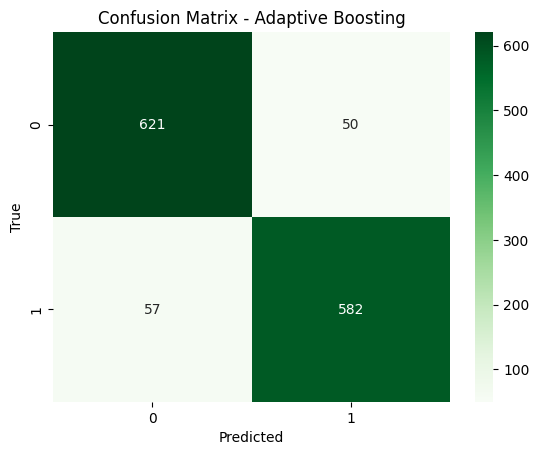

----------------------------------------------------------------------------------------------------
Adaptive Boosting Classification Report (n = 50):
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       671
           1       0.92      0.91      0.92       639

    accuracy                           0.92      1310
   macro avg       0.92      0.92      0.92      1310
weighted avg       0.92      0.92      0.92      1310

Full Classification Report:
Precision, Recall, F1-Score (Micro):
Precision: 0.9198473282442748
Recall: 0.9198473282442748
F1-Score: 0.9198473282442748

Precision, Recall, F1-Score (Macro):
Precision: 0.919936242111945
Recall: 0.9196688659861136
F1-Score: 0.919776224950848

Precision, Recall, F1-Score (Weighted):
Precision: 0.9198743889866091
Recall: 0.9198473282442748
F1-Score: 0.9198345661146855


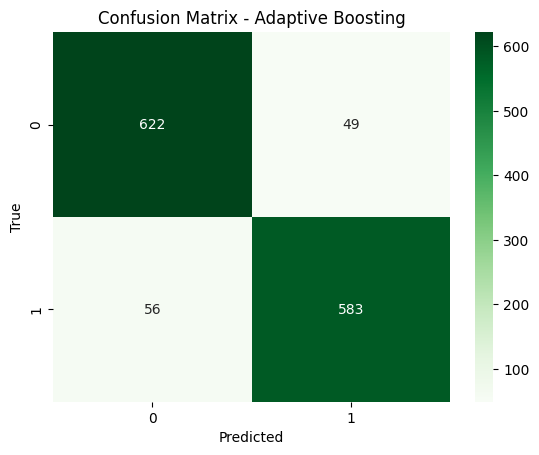

----------------------------------------------------------------------------------------------------


In [67]:
from sklearn.ensemble import AdaBoostClassifier

def adaboosting(n : int = 50):
    """ n : integer for n_estimators """
    abc = AdaBoostClassifier(random_state = None, n_estimators = n, algorithm = 'SAMME')
    abc.fit(X_train_scaled, y_train)

    y_pred_abc = abc.predict(X_test_scaled)

    print(colored(f"Adaptive Boosting Classification Report (n = {n}):", "cyan"))
    print(colored(classification_report(y_test, y_pred_abc), "green"))

    print(colored("Full Classification Report:", "magenta"))

    print(colored("Precision, Recall, F1-Score (Micro):", "yellow"))
    print(colored(f"Precision: {precision_score(y_test, y_pred_abc, average='micro')}", "green"))
    print(colored(f"Recall: {recall_score(y_test, y_pred_abc, average='micro')}", "green"))
    print(colored(f"F1-Score: {f1_score(y_test, y_pred_abc, average='micro')}", "green"))

    print(colored("\nPrecision, Recall, F1-Score (Macro):", "yellow"))
    print(colored(f"Precision: {precision_score(y_test, y_pred_abc, average='macro')}", "green"))
    print(colored(f"Recall: {recall_score(y_test, y_pred_abc, average='macro')}", "green"))
    print(colored(f"F1-Score: {f1_score(y_test, y_pred_abc, average='macro')}", "green"))

    print(colored("\nPrecision, Recall, F1-Score (Weighted):", "yellow"))
    print(colored(f"Precision: {precision_score(y_test, y_pred_abc, average='weighted')}", "green"))
    print(colored(f"Recall: {recall_score(y_test, y_pred_abc, average='weighted')}", "green"))
    print(colored(f"F1-Score: {f1_score(y_test, y_pred_abc, average='weighted')}", "green"))

    sns.heatmap(confusion_matrix(y_test, y_pred_abc), annot = True, fmt = 'd', cmap = 'Greens')
    plt.title('Confusion Matrix - Adaptive Boosting')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

for n in [10, 20, 30, 40, 50]:
    adaboosting(n = n)
    print(colored("-"*100, "red"))

#### ⚡️ XGBoost

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'learning_rate' : [0.2, 0.4],
    'max_depth': [6, 7],
    'min_samples_split': [5, 6],
    'min_samples_leaf': [4, 5],
    'max_leaf_nodes': [5, 6],
    'n_estimators' : [50, 70],
    'max_features' : [4, 6],
}

xgb = GradientBoostingClassifier(
    # learning_rate = 0.1, 
    # n_estimators = 100, 
    # max_depth = 3, 
    random_state = None
)
grid_search = GridSearchCV(
    estimator = xgb,
    param_grid = param_grid,
    scoring = 'accuracy',  
    cv = 5,                
    verbose = 0,
    n_jobs = -1            
)
grid_search.fit(X_train_scaled, y_train)
print(colored(f"Best Parameters: {grid_search.best_params_}", "magenta"))

Best Parameters: {'learning_rate': 0.4, 'max_depth': 7, 'max_features': 4, 'max_leaf_nodes': 6, 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 70}


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       671
           1       0.97      0.97      0.97       639

    accuracy                           0.97      1310
   macro avg       0.97      0.97      0.97      1310
weighted avg       0.97      0.97      0.97      1310

Full Classification Report:
Precision, Recall, F1-Score (Micro):
Precision: 0.9725190839694656
Recall: 0.9725190839694656
F1-Score: 0.9725190839694656

Precision, Recall, F1-Score (Macro):
Precision: 0.9724538974680623
Recall: 0.9725773085274355
F1-Score: 0.9725065235793289

Precision, Recall, F1-Score (Weighted):
Precision: 0.9725408128032669
Recall: 0.9725190839694656
F1-Score: 0.9725208783109138


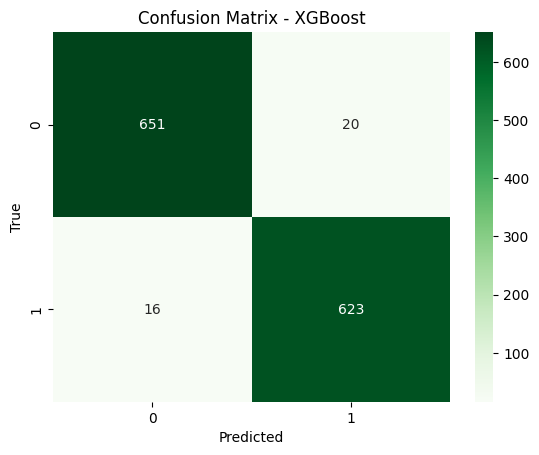

In [72]:
xgb = GradientBoostingClassifier(
    learning_rate = 0.4, 
    n_estimators = 70, 
    max_depth = 7, 
    max_features = 4,
    max_leaf_nodes = 6,
    min_samples_leaf = 5,
    min_samples_split = 6,
    random_state = None
)

xgb.fit(X_train_scaled, y_train)

y_pred_xgb = xgb.predict(X_test_scaled)

print(colored("XGBoost Classification Report:", "cyan"))
print(colored(classification_report(y_test, y_pred_xgb), "green"))

print(colored("Full Classification Report:", "magenta"))

print(colored("Precision, Recall, F1-Score (Micro):", "yellow"))
print(colored(f"Precision: {precision_score(y_test, y_pred_xgb, average='micro')}", "green"))
print(colored(f"Recall: {recall_score(y_test, y_pred_xgb, average='micro')}", "green"))
print(colored(f"F1-Score: {f1_score(y_test, y_pred_xgb, average='micro')}", "green"))

print(colored("\nPrecision, Recall, F1-Score (Macro):", "yellow"))
print(colored(f"Precision: {precision_score(y_test, y_pred_xgb, average='macro')}", "green"))
print(colored(f"Recall: {recall_score(y_test, y_pred_xgb, average='macro')}", "green"))
print(colored(f"F1-Score: {f1_score(y_test, y_pred_xgb, average='macro')}", "green"))

print(colored("\nPrecision, Recall, F1-Score (Weighted):", "yellow"))
print(colored(f"Precision: {precision_score(y_test, y_pred_xgb, average='weighted')}", "green"))
print(colored(f"Recall: {recall_score(y_test, y_pred_xgb, average='weighted')}", "green"))
print(colored(f"F1-Score: {f1_score(y_test, y_pred_xgb, average='weighted')}", "green"))

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [73]:
# from xgboost import XGBClassifier

# param_grid = {
#     # 'learning_rate' : [n/10 for n in range(10)],
#     # 'max_depth': [3, 5, 7, 9, 10],
#     # 'min_samples_split': [n for n in range(2, 20)],
#     # 'min_samples_leaf': [n for n in range(1, 20)],
#     # 'max_leaf_nodes': [n for n in range(10, 15)],
#     # 'n_estimators' : [n for n in range(10, 15)],
#     # 'max_features' : [n for n in range(2, 6)],
# }


# xgb = XGBClassifier(urandom_state = 42, eval_metric = 'logloss')
# grid_search = GridSearchCV(
#     estimator = xgb,
#     param_grid = param_grid,
#     scoring = 'accuracy',  
#     cv = 5,                
#     verbose = 0,
#     n_jobs = -1            
# )
# grid_search.fit(X_train_scaled, y_train)
# print(colored(f"Best Parameters: {grid_search.best_params_}", "magenta"))

# # -----------------------------------------------------------------------------------------

# # xgb = XGBClassifier(random_state = 42, eval_metric='logloss')
# # xgb.fit(X_train_scaled, y_train)

# # y_pred_xgb = xgb.predict(X_test_scaled)

# # print(colored("XGBoost Classification Report:", "cyan"))
# # print(colored(classification_report(y_test, y_pred_xgb), "green"))

# # sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens')
# # plt.title('Confusion Matrix - XGBoost')
# # plt.xlabel('Predicted')
# # plt.ylabel('True')
# # plt.show()

### 🛠 From Scratch  
In this subsection, you should implement the SAMME algorithm for adaptive boosting from scratch.Then you should deploy this boosting model and a base estimator, which is Gaussian Naive Bayes here, to classify hotels.

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       671
           1       0.88      0.90      0.89       639

    accuracy                           0.90      1310
   macro avg       0.90      0.90      0.90      1310
weighted avg       0.90      0.90      0.90      1310

Full Classification Report:
Precision, Recall, F1-Score (Micro):
Precision: 0.8954198473282443
Recall: 0.8954198473282443
F1-Score: 0.8954198473282443

Precision, Recall, F1-Score (Macro):
Precision: 0.8954021220258074
Recall: 0.8956372778815632
F1-Score: 0.8954022325302728

Precision, Recall, F1-Score (Weighted):
Precision: 0.8956857268647971
Recall: 0.8954198473282443
F1-Score: 0.8954353897970424


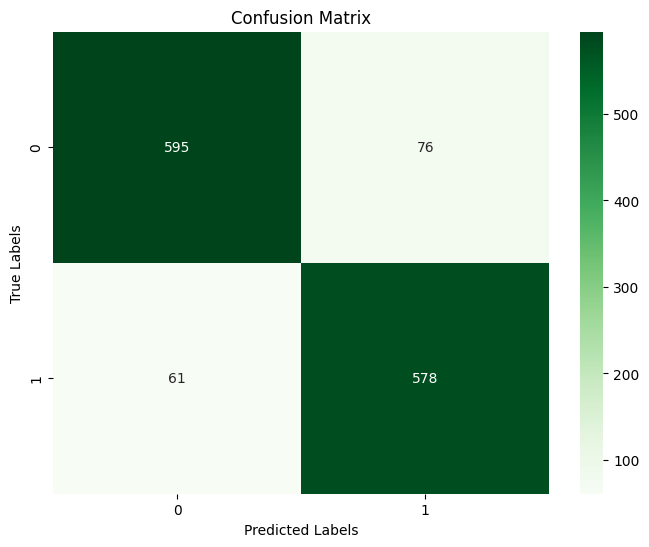

In [74]:
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.naive_bayes import GaussianNB
import numpy as np

class SimpleMultiClassBoosting(BaseEstimator, ClassifierMixin):
    def __init__(self, base_estimator=GaussianNB(), n_estimators = 50):
        self.base_estimator = base_estimator if base_estimator is not None else GaussianNB()
        self.n_estimators = n_estimators
        self.learners = []
        self.learner_weights = []

    def fit(self, X, y):
        n_samples, n_classes = X.shape[0], len(np.unique(y))
        self.weights = np.ones(n_samples) / n_samples  
        
        for _ in range(self.n_estimators):
            learner = clone(self.base_estimator)
            learner.fit(X, y, sample_weight=self.weights)
            predictions = learner.predict(X)
            
            misclassified = predictions != y
            error_rate = np.sum(self.weights * misclassified) / np.sum(self.weights)
            
            if error_rate >= 1 - (1 / n_classes):
                continue
            
            learner_weight = np.log((1 - error_rate) / error_rate) + np.log(n_classes - 1)
            
            self.weights *= np.exp(learner_weight * misclassified)
            self.weights /= np.sum(self.weights)  
            
            self.learners.append(learner)
            self.learner_weights.append(learner_weight)

    def predict(self, X):
        learner_predictions = np.array([learner.predict(X) for learner in self.learners])
        
        weighted_votes = np.zeros((X.shape[0], len(np.unique(learner_predictions))))
        for i, weight in enumerate(self.learner_weights):
            for j, pred in enumerate(learner_predictions[i]):
                weighted_votes[j, pred] += weight
        
        final_predictions = np.argmax(weighted_votes, axis=1)
        return final_predictions
    
boosting_model = SimpleMultiClassBoosting(n_estimators = 50)
boosting_model.fit(X_train, y_train)
y_pred = boosting_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(colored("Classification Report:", "cyan"))
print(colored(classification_report(y_test, y_pred), "green"))

print(colored("Full Classification Report:", "magenta"))

print(colored("Precision, Recall, F1-Score (Micro):", "yellow"))
print(colored(f"Precision: {precision_score(y_test, y_pred, average='micro')}", "green"))
print(colored(f"Recall: {recall_score(y_test, y_pred, average='micro')}", "green"))
print(colored(f"F1-Score: {f1_score(y_test, y_pred, average='micro')}", "green"))

print(colored("\nPrecision, Recall, F1-Score (Macro):", "yellow"))
print(colored(f"Precision: {precision_score(y_test, y_pred, average='macro')}", "green"))
print(colored(f"Recall: {recall_score(y_test, y_pred, average='macro')}", "green"))
print(colored(f"F1-Score: {f1_score(y_test, y_pred, average='macro')}", "green"))

print(colored("\nPrecision, Recall, F1-Score (Weighted):", "yellow"))
print(colored(f"Precision: {precision_score(y_test, y_pred, average='weighted')}", "green"))
print(colored(f"Recall: {recall_score(y_test, y_pred, average='weighted')}", "green"))
print(colored(f"F1-Score: {f1_score(y_test, y_pred, average='weighted')}", "green"))


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

$Accuracy = \frac{TP + TN}{TP + FP + FN + TN}$

$Precision = \frac{TP}{TP + FP}$

$Recall = \frac{TP}{TP + FN}$

$F1-score = 2 \times \frac{Recall \times Precision}{Recall + Precision}